# Convolutional Neural Network with Keras

In [1]:
import numpy as np
import pandas as pd
import keras
from keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt

## Data Preprocessing

In [3]:
train_df = pd.read_csv('full_train.csv')

In [4]:
np.random.seed(40)
train_df = train_df.sample(frac=1).reset_index(drop=True)

In [5]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10


In [6]:
val_df = train_df.sample(int(train_df.shape[0] * 0.2))

In [7]:
X_val = val_df.iloc[:, :784].values.reshape(-1, 28, 28, 1)
y_val = val_df['class']
y_val = to_categorical(y_val)

In [8]:
print(X_val.shape)
print(y_val.shape)

(154108, 28, 28, 1)
(154108, 93)


In [9]:
train_df = train_df.drop(val_df.index)

In [10]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10


In [11]:
X_train = train_df.iloc[:, :784].values
y_train = train_df['class']

In [12]:
X_train = X_train.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train)

In [13]:
print(X_train.shape)
print(y_train.shape)

(616433, 28, 28, 1)
(616433, 93)


In [14]:
test_df = pd.read_csv('full_test.csv')

In [15]:
test_df = test_df.sample(frac=1).reset_index(drop=True)

In [16]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,class
0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77
1,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47
2,0.023529,0.003922,0.0,0.0,0.003922,0.011765,0.0,0.0,0.0,0.0,...,0.007843,0.039216,0.015686,0.003922,0.000000,0.023529,0.031373,0.003922,0.031373,77
3,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49
4,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.015686,0.023529,0.000000,0.000000,0.003922,0.000000,0.000000,0.003922,0.027451,92


In [17]:
X_test = test_df.iloc[:, :784].values.reshape(-1, 28, 28, 1)
y_test = test_df['class']
y_test = to_categorical(y_test)

In [18]:
print(X_test.shape)
print(y_test.shape)

(137042, 28, 28, 1)
(137042, 93)


In [19]:
# The keys of the dictionary are the classification numbers in the df and
# the values are the ASCII codes of the characters
letter_key = dict()
fin = open("letter_key.txt")
for line in fin:
    line = line.strip()
    line = str.split(line, sep = ' ')
    letter_key[line[0]] = line[1]

In [20]:
letter_key

{'0': '100',
 '1': '101',
 '2': '102',
 '3': '103',
 '4': '104',
 '5': '105',
 '6': '106',
 '7': '107',
 '8': '108',
 '9': '109',
 '10': '110',
 '11': '111',
 '12': '112',
 '13': '113',
 '14': '114',
 '15': '115',
 '16': '116',
 '17': '117',
 '18': '118',
 '19': '119',
 '20': '120',
 '21': '121',
 '22': '122',
 '23': '123',
 '24': '124',
 '25': '125',
 '26': '126',
 '27': '33',
 '28': '34',
 '29': '35',
 '30': '36',
 '31': '37',
 '32': '38',
 '33': '39',
 '34': '40',
 '35': '41',
 '36': '42',
 '37': '43',
 '38': '44',
 '39': '45',
 '40': '46',
 '41': '47',
 '42': '48',
 '43': '49',
 '44': '50',
 '45': '51',
 '46': '52',
 '47': '53',
 '48': '54',
 '49': '55',
 '50': '56',
 '51': '57',
 '52': '58',
 '53': '59',
 '54': '60',
 '55': '61',
 '56': '62',
 '57': '63',
 '58': '64',
 '59': '65',
 '60': '66',
 '61': '67',
 '62': '68',
 '63': '69',
 '64': '70',
 '65': '71',
 '66': '72',
 '67': '73',
 '68': '74',
 '69': '75',
 '70': '76',
 '71': '77',
 '72': '78',
 '73': '79',
 '74': '80',
 '75': '

## Building the Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Conv2D, Flatten, MaxPooling2D, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [22]:
model = Sequential()
model.add(Input(shape = (28, 28, 1)))
model.add(Conv2D(filters = 32, kernel_size = 3, activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(16, 3, activation = "relu"))
model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(64, activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(len(letter_key), activation = "softmax"))

In [23]:
opt = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [24]:
monitor_val_acc = EarlyStopping(monitor = 'val_accuracy', patience = 3)
model_checkpoint = ModelCheckpoint("best_model.keras", save_best_only = True)

model_hist = model.fit(X_train, y_train, epochs = 10, batch_size = 64, validation_data = (X_val, y_val), callbacks = [monitor_val_acc, model_checkpoint])

Epoch 1/10
9632/9632 ━━━━━━━━━━━━━━━━━━━━ 471s 48ms/step - accuracy: 0.7937 - loss: 0.6389 - val_accuracy: 0.8236 - val_loss: 0.5245
Epoch 2/10
9632/9632 ━━━━━━━━━━━━━━━━━━━━ 289s 30ms/step - accuracy: 0.8441 - loss: 0.4356 - val_accuracy: 0.8400 - val_loss: 0.4469
Epoch 3/10
9632/9632 ━━━━━━━━━━━━━━━━━━━━ 274s 28ms/step - accuracy: 0.8540 - loss: 0.4054 - val_accuracy: 0.8517 - val_loss: 0.4224
Epoch 4/10
9632/9632 ━━━━━━━━━━━━━━━━━━━━ 221s 23ms/step - accuracy: 0.8570 - loss: 0.3911 - val_accuracy: 0.8501 - val_loss: 0.4211
Epoch 5/10
9632/9632 ━━━━━━━━━━━━━━━━━━━━ 217s 23ms/step - accuracy: 0.8600 - loss: 0.3805 - val_accuracy: 0.8446 - val_loss: 0.4360
Epoch 6/10
9632/9632 ━━━━━━━━━━━━━━━━━━━━ 223s 23ms/step - accuracy: 0.8629 - loss: 0.3710 - val_accuracy: 0.8503 - val_loss: 0.4299


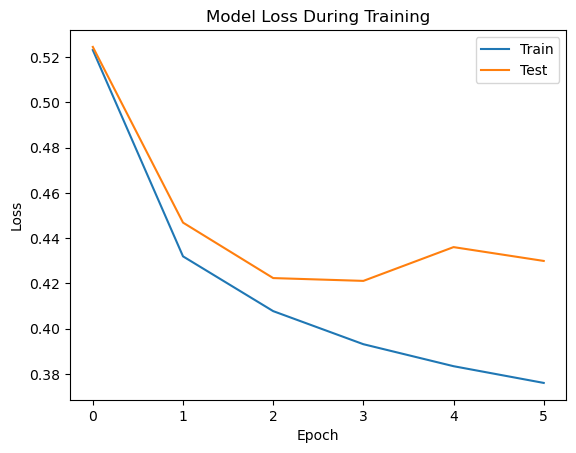

In [25]:
plt.figure()
plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc = 'upper right')
plt.show()

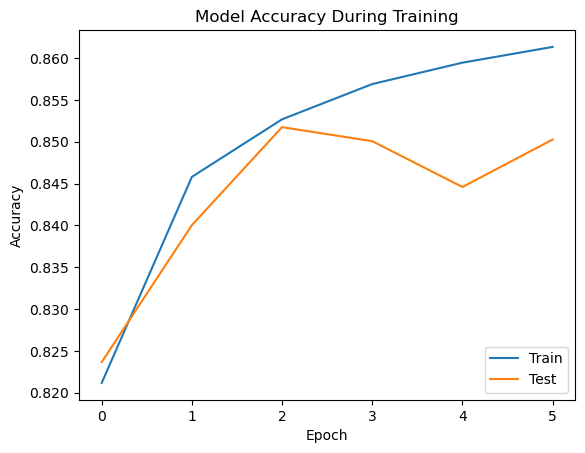

In [26]:
plt.figure()
plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.title('Model Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'lower right')
plt.show()

In [27]:
model.evaluate(X_test, y_test)

4283/4283 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - accuracy: 0.8491 - loss: 0.4277


[0.4262021780014038, 0.8489441275596619]

In [29]:
model.save("full_ocr.keras")

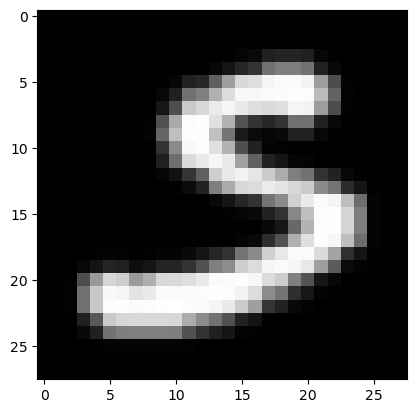

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Prediction: S
True Letter: S


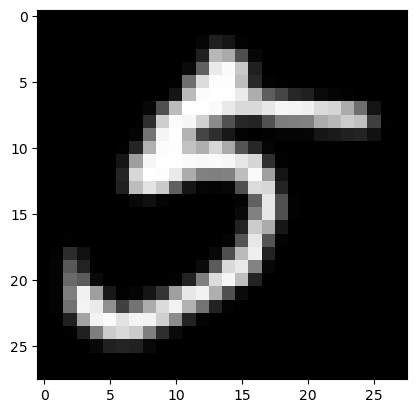

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: 5
True Letter: 5


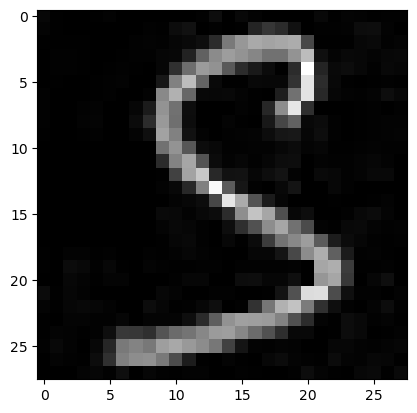

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction: S
True Letter: S


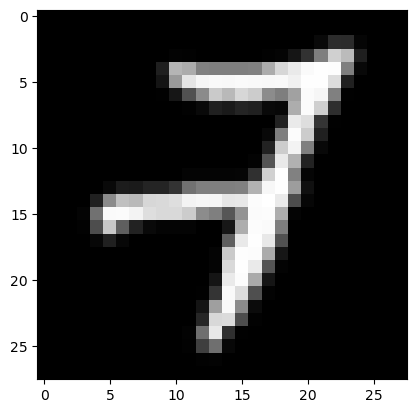

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: 7
True Letter: 7


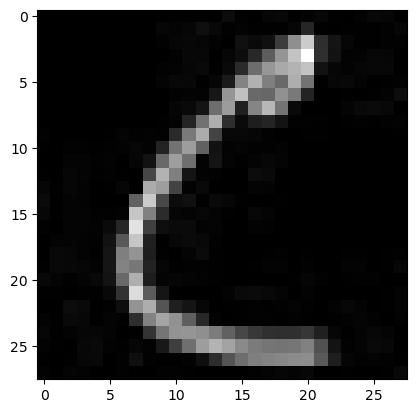

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction: C
True Letter: c


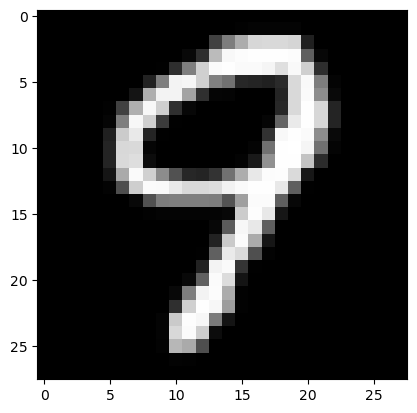

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction: 9
True Letter: 9


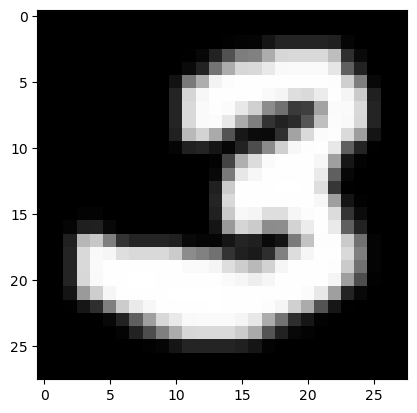

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: 3
True Letter: 3


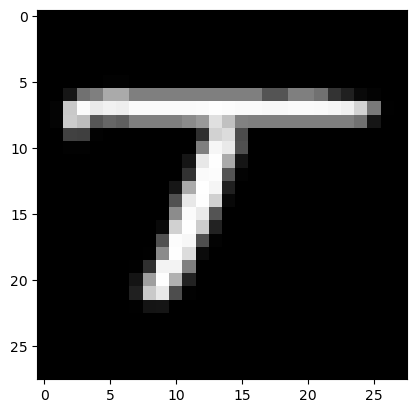

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: T
True Letter: T


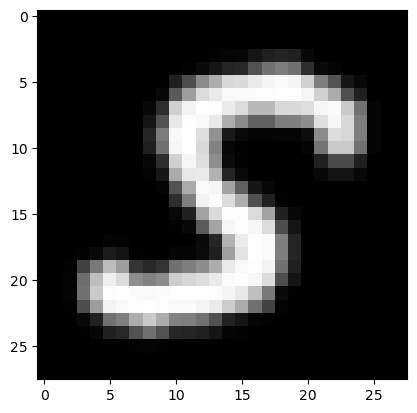

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Prediction: S
True Letter: S


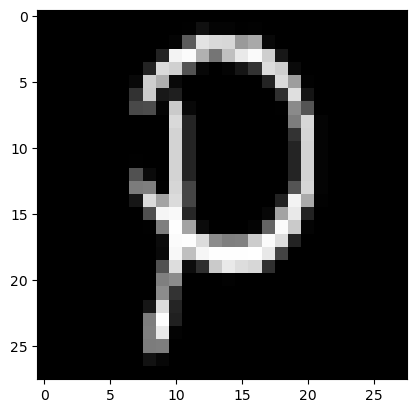

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction: P
True Letter: P


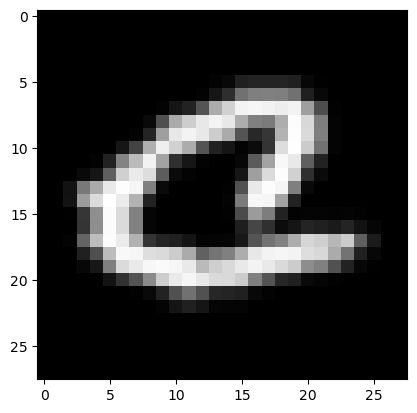

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: C
True Letter: c


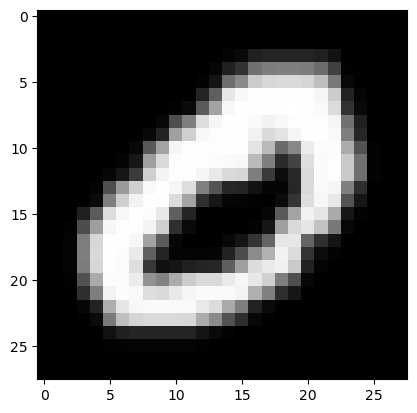

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prediction: O
True Letter: O


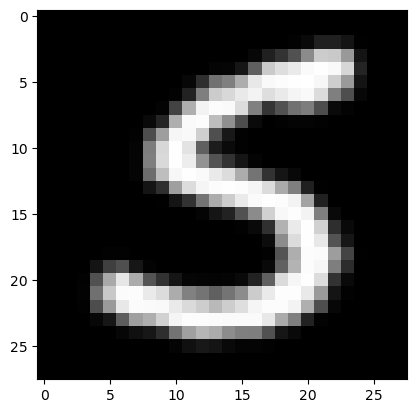

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: S
True Letter: s


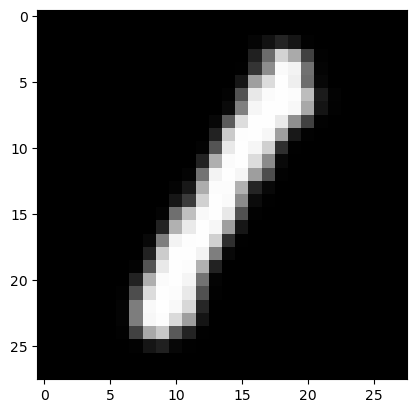

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: 1
True Letter: 1


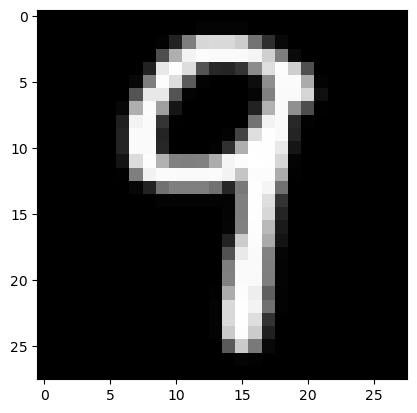

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: 9
True Letter: 9


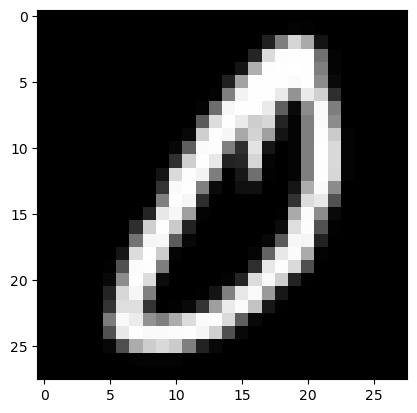

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction: 0
True Letter: 0


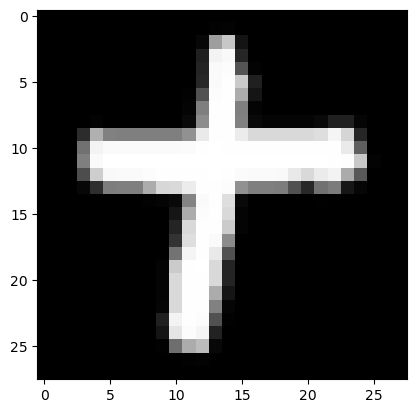

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: t
True Letter: t


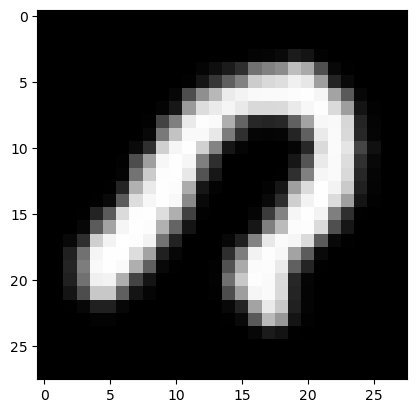

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: n
True Letter: n


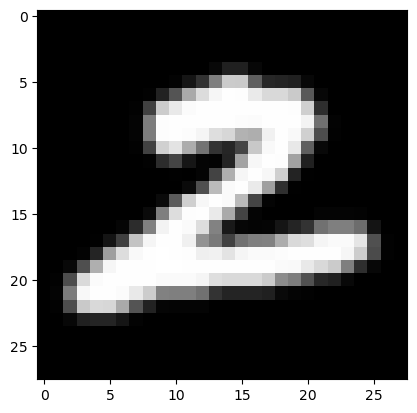

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction: 2
True Letter: 2


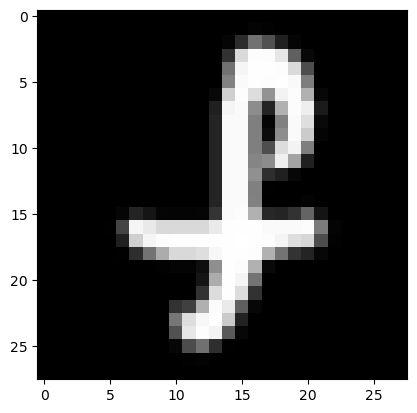

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction: F
True Letter: f


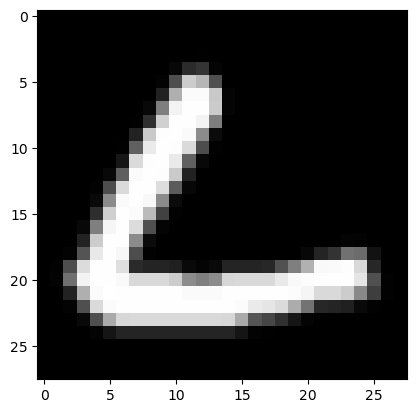

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction: L
True Letter: L


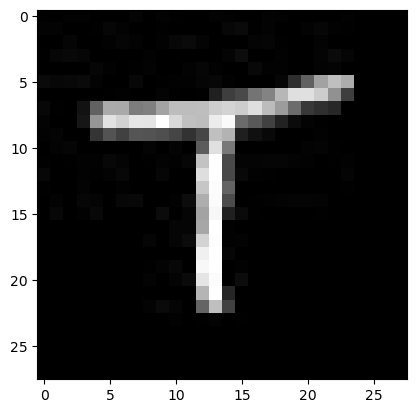

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: T
True Letter: T


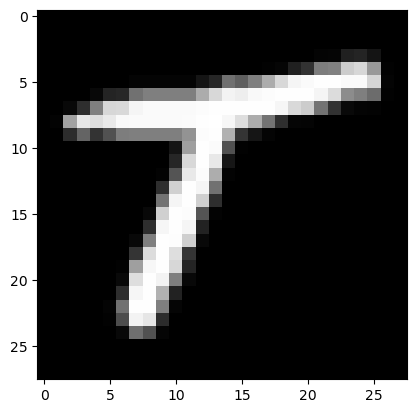

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction: T
True Letter: T


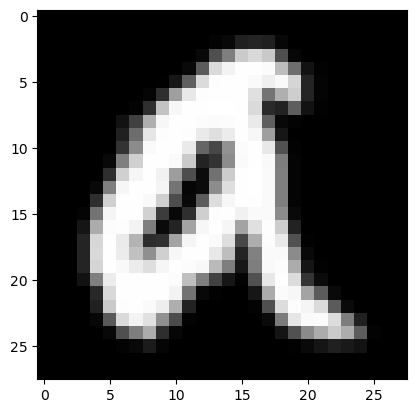

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: a
True Letter: a


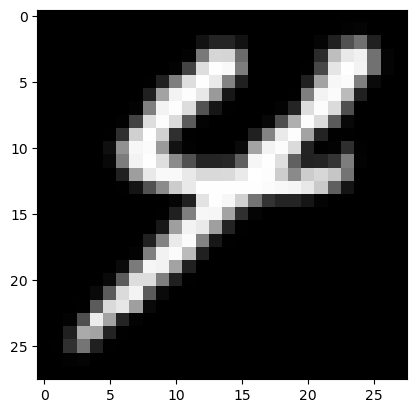

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction: 4
True Letter: 4


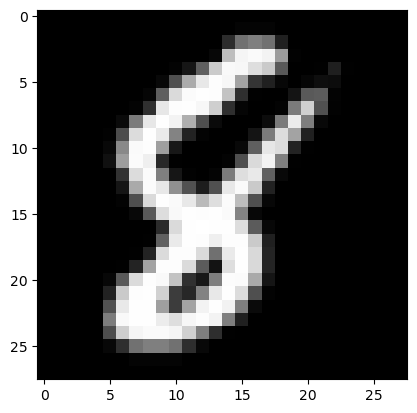

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction: 8
True Letter: 8


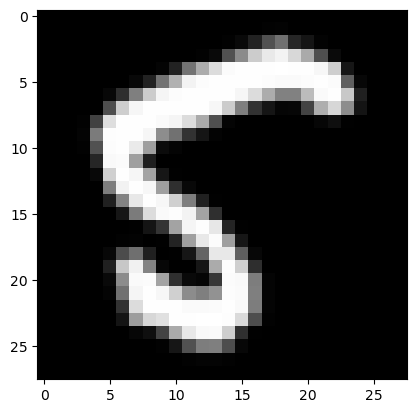

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction: S
True Letter: S


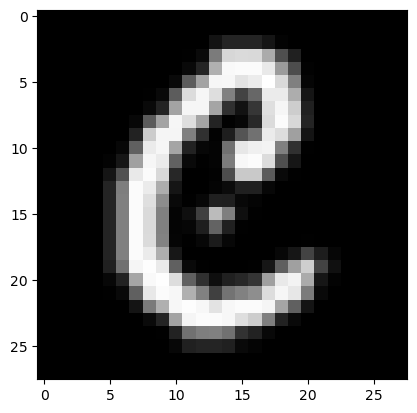

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Prediction: C
True Letter: c


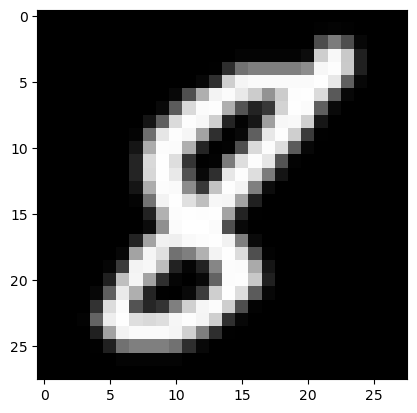

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: 8
True Letter: 8


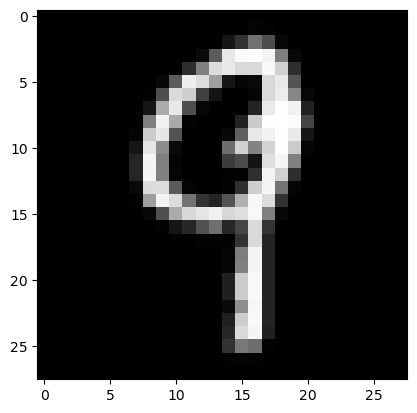

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Prediction: 9
True Letter: 9


In [37]:
for index in range(30):
    img = X_test[index, :]
    plt.imshow(img, cmap = 'gray')
    plt.show()

    y_pred = model.predict(img.reshape(1, 28, 28, 1))
    print(f"Prediction: {chr(int(letter_key[str(np.argmax(y_pred))]))}")
    print(f"True Letter: {chr(int(letter_key[str(np.argmax(y_test[index]))]))}")

In [31]:
from keras.models import load_model

In [33]:
best_model = load_model("full_ocr.keras")

In [34]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1936)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         123,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 93)                  │           6,045 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 405,769 (1.55 MB)

 Trainable params: 135,181 (528.05 KB)

 Non-trainable params: 224 (896.00 B)

 Optimizer params: 270,364 (1.03 MB)

In [35]:
best_model.evaluate(X_test, y_test)

4283/4283 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - accuracy: 0.8491 - loss: 0.4277


[0.4262021780014038, 0.8489441275596619]